Missing Data:  Round Number    0
Date            0
Home Team       0
Away Team       0
Result          0
dtype: int64
  Round Number                Date            Home Team            Away Team  \
0            1 2024-09-06 00:20:00   Kansas City Chiefs     Baltimore Ravens   
1            1 2024-09-07 00:15:00  Philadelphia Eagles    Green Bay Packers   
2            1 2024-09-08 17:00:00      Atlanta Falcons  Pittsburgh Steelers   
3            1 2024-09-08 17:00:00        Buffalo Bills    Arizona Cardinals   
4            1 2024-09-08 17:00:00        Chicago Bears     Tennessee Titans   

    Result  
0  27 - 20  
1  34 - 29  
2  10 - 18  
3  34 - 28  
4  24 - 17  
  Round Number                Date            Home Team            Away Team  \
0            1 2024-09-06 00:20:00   Kansas City Chiefs     Baltimore Ravens   
1            1 2024-09-07 00:15:00  Philadelphia Eagles    Green Bay Packers   
2            1 2024-09-08 17:00:00      Atlanta Falcons  Pittsburgh Steelers   
3  

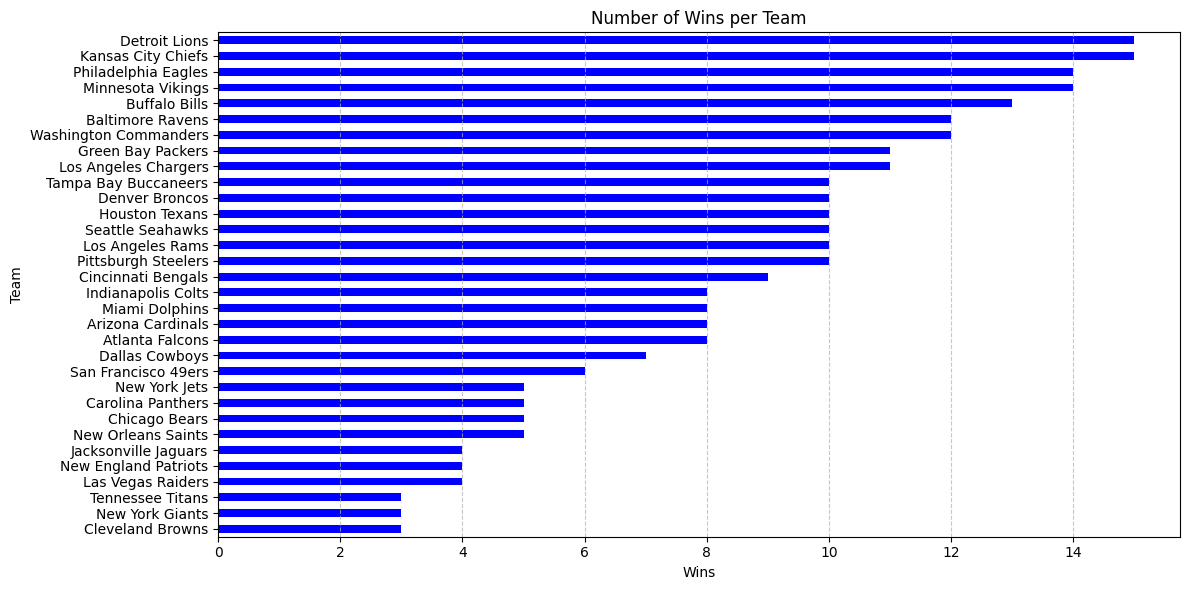

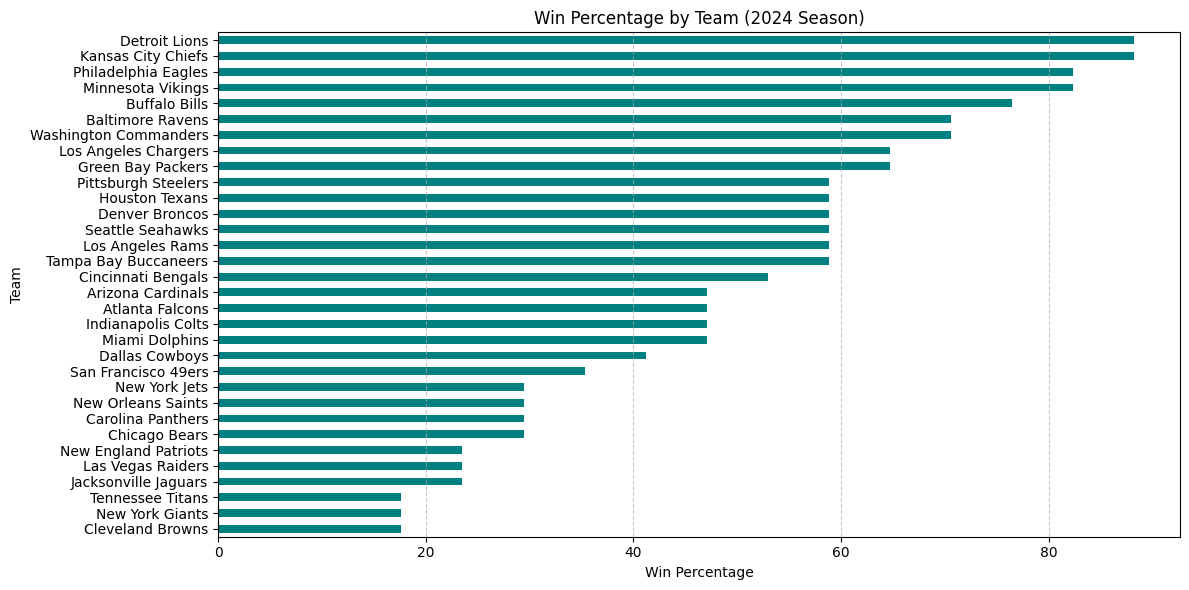

In [ ]:
##NFL 2024 Season Analytics

#This project analyses the 2024 NFL Regular Season data to visualize and track team performance.
#The analysis excludes the post season and focuses on regular season games.

import pandas as pd
import matplotlib.pyplot as plt

#Load dataset
df = pd.read_csv('nfl-2024-UTC.csv')

#Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')

#Drop any irrelevant columns
df_clean = df.drop(columns=['Match Number', 'Location'])

#Check for missing values
missing_data = df_clean.isnull().sum()
print("Missing Data: ", missing_data)

#Preview the cleaned data
print(df_clean.head())

#Filter out playoffs/superbowl
playoffs_round = ['Wild Card Round', 'Divisional Round', 'Conference Champs', 'Super Bowl']
df_clean = df_clean[~df_clean['Round Number'].isin(playoffs_round)]

def extract_scores(result):
  try:
    home_score, away_score = result.strip().split(' - ')
    return int(home_score), int(away_score)
  except:
    return None, None

#Extract Scores
df_clean[['Home Score', 'Away Score']] = df_clean['Result'].apply(lambda x: pd.Series(extract_scores(x)))

#Calculate the margin of victory
df_clean['Home Margin'] = df_clean['Home Score'] - df_clean['Away Score']

#Check the updates data
print(df_clean.head())

#Count wins per team
wins = []
for _, row in df_clean.iterrows():
  if pd.isnull(row['Home Score']) or pd.isnull(row['Away Score']):
    continue
  if row['Home Score'] > row['Away Score']:
    wins.append(row['Home Team'])
  elif row['Away Score'] > row['Home Score']:
    wins.append(row['Away Team'])

#Count wins per team
win_counts = pd.Series(wins).value_counts()

#Plot
plt.figure(figsize=(12,6))
win_counts.sort_values().plot(kind='barh' , color='blue')
plt.title("Number of Wins per Team")
plt.xlabel('Wins')
plt.ylabel('Team')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Calculate win percentage for each team
total_games = df_clean['Home Team'].value_counts() + df_clean['Away Team'].value_counts()
win_percentage = win_counts / total_games * 100

#Plot win percentage
plt.figure(figsize=(12,6))
win_percentage.sort_values().plot(kind='barh', color='teal')
plt.title('Win Percentage by Team (2024 Season)')
plt.xlabel('Win Percentage')
plt.ylabel('Team')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()